# Evolutionary approach to the Flow Shop problem 

The Problem
-------------------------
Suppose you have N jobs and M machines. Each job consists in M operations on each machine. The i-th operation is executed on the i-th machine and each operation could start only if the previous have already finished. Jobs can be executed in any order. Jobs order could differ depending on machine. The problem is to find optimal solution, i.e. that one with the minimal makespan.

Problem overview
-------------------------
The problem is P-hard only for the case when M = 2. Then it's exactly solved by the Johnson's algorithm. The work is dedicated to the case when M > 2, and, moreover, order of jobs on machines could differ. There are several works on the problem, but most of them solves permutation problem, when order on machines remains the same. Our goal is to find an evolutionary approach to the general flow shop problem. 

Chromosome representation
-------------------------
TBD

In [10]:
from collections import deque
from typing import List, Deque
from job import Job
from functools import cmp_to_key

def f2_cmax_johnson_solver(jobs: List[Job]) -> List[Job]:
    """
    Solver for the "F2 || C_max" task introduced in the following article:
    
    S.M. Johnson. Optimal two-and-three-stage production schedules with set-up times included.
    Naval Research Logistic Quaterly, 1:61–68, 1954
    
    link: https://www.rand.org/content/dam/rand/pubs/papers/2008/P402.pdf
    
    :param jobs: list of jobs to optimize schedule
    :returns: jobs ordered to minimize the makespan. As for F2 an order is equal for both stages, list is 1xN
    """
    # Validate input
    for job in jobs:
        if len(job.actions) != 2:
            raise ValueError("Johnson solver is able to solve F2||C_max only. "
                             f"There is a job with {len(job.actions)} actions, so it couldn't be executed as F2 job")

    # Sort by minimal stage time
    def jobs_comparator(lhs: Job, rhs: Job) -> int:
        return min(lhs.actions) - min(rhs.actions)

    sorted_jobs = sorted(jobs, key=cmp_to_key(jobs_comparator))
    first_stage_jobs: Deque[Job] = deque()
    second_stage_jobs: Deque[Job] = deque()

    for job in sorted_jobs:
        if job.actions[0] < job.actions[1]:
            first_stage_jobs.append(job)
        else:
            second_stage_jobs.appendleft(job)

    return list(first_stage_jobs + second_stage_jobs)

In [26]:
from schedule import order_to_schedule


from data import load_data
jobs_data = load_data("data2x20.pkl")

order = f2_cmax_johnson_solver(jobs_data)
schedule = order_to_schedule([order, order])
print(schedule)

######################################################
9   5  17  15  1   7  6  3 1816 1110 2   19  8 4   0 
 9  12 14  5   17  15  1   7  6  3 181611102   8  4  0
######################################################
Makespan: 54


In [12]:
import pickle

with open("data/res.pkl", 'rb') as inp:
    runs = pickle.load(inp)
print(runs)

[[72, 71, 70, 70, 69, 69, 69, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 66, 66, 66, 66, 66, 64], [72, 70, 70, 70, 70, 70, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 68, 68, 68, 68, 67, 67, 66, 66, 66, 66, 66, 65, 64, 64, 64, 63, 63, 63], [72, 72, 70, 70, 70, 70, 70, 70, 69, 69, 68, 68, 68, 68, 68, 67, 67, 67, 67, 67, 67, 67, 67, 67, 66, 66, 65, 65, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 63, 63], [71, 70, 70, 70, 70, 70, 69, 69, 69, 69, 69, 69, 68, 68, 68, 68, 67, 67, 67, 67, 67, 67, 67, 67, 67, 66, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 65, 64, 63, 62], [72, 72, 71, 71, 71, 70, 70, 70, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 68, 67, 67, 67, 67, 66, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 62], [74, 72, 71, 71, 71, 71, 71, 70, 70, 70, 69, 69, 69, 68, 68, 68, 68, 67, 67, 67, 67, 67, 67, 67, 66, 66, 65, 65, 65, 64, 64, 64, 64, 64, 63, 61, 61, 61, 60, 60], [73, 72, 72, 71, 71, 71, 71

[ 0.          1.02564103  2.05128205  3.07692308  4.1025641   5.12820513
  6.15384615  7.17948718  8.20512821  9.23076923 10.25641026 11.28205128
 12.30769231 13.33333333 14.35897436 15.38461538 16.41025641 17.43589744
 18.46153846 19.48717949 20.51282051 21.53846154 22.56410256 23.58974359
 24.61538462 25.64102564 26.66666667 27.69230769 28.71794872 29.74358974
 30.76923077 31.79487179 32.82051282 33.84615385 34.87179487 35.8974359
 36.92307692 37.94871795 38.97435897 40.        ]


[(40.0, 100.0)]

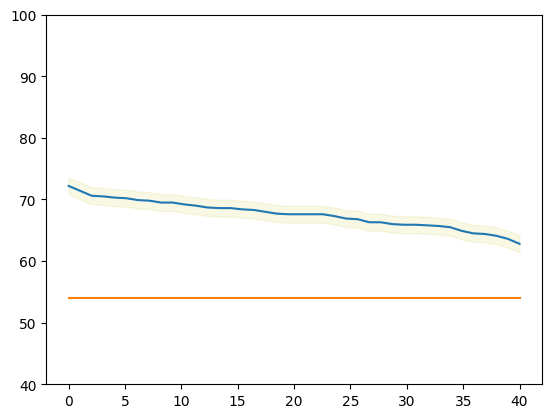

In [35]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
x = np.linspace(0, len(runs[0]), len(runs[0]))
print(x)
y = [np.mean([runs[j][i] for j in range(len(runs))]) for i in range(len(runs[0]))]
# print(y)
#some confidence interval
ci = 2*1.96 * np.std(y)/np.sqrt(len(x))
optimal = schedule.makespan

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='y', alpha=.1)
ax.plot([0, len(runs[0])], [optimal, optimal])
ax.set(ylim = (40,100))